# Data  Analysis_France 1551-1600

1. Analysis for decriptive statistics
2. linguistic features 
3. social network analysis 

## connect to data set

In [275]:
import pandas as pd
import os
import numpy as np
import seaborn as sns

In [276]:
df = pd.read_csv(r'D:\KU Leuven\DH Introduction\Assignment2\DH-France-1551-1600_reday_to_analysis.csv')

In [277]:
df.head()

,record - leader,control number,008,035^$ $ $a,035^$ $ $a_2,040,040^$ $ $a,040$ $ $b,040$ $ $e,041,...,504,561,563,545,260,957,090,400,863,490
0,01160nam a2200277 u 4500,9992130780001488,900313s1570 fr |||| |w 000|0 lat c,(BeLVLBS)9992173638401471,(EXLNZ-32KUL_LIBIS_NETWORK)9992173638401471,^$ $ $aBeLVLBS$ $ $bLanguage of cataloging var...,BeLVLBS,Language of cataloging varies,rda based,^_lat,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01290nam a2200313 u 4500,9992132490501488,900313s1570 fr |||| |w 000|0 lat c,(BeLVLBS)9992175745101471,(EXLNZ-32KUL_LIBIS_NETWORK)9992175745101471,$ $ $bLanguage of cataloging varies$ $ $erda b...,NaN,Language of cataloging varies,rda based,^_lat,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01301nam a2200301 u 4500,9992133457501488,900313s1570 fr |||| |w 000|0 lat c,(BeLVLBS)9992178710701471,(EXLNZ-32KUL_LIBIS_NETWORK)9992178710701471,$ $ $bLanguage of cataloging varies$ $ $erda b...,NaN,Language of cataloging varies,rda based,^_lat,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01539nam a2200289 u 4500,9992133466101488,900313s1570 fr |||| |w 000|0 lat c,(BeLVLBS)9992178720201471,(EXLNZ-32KUL_LIBIS_NETWORK)9992178720201471,$ $ $bLanguage of cataloging varies$ $ $erda b...,NaN,Language of cataloging varies,rda based,^_fre,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01129nam a2200265 u 4500,9992133466501488,900313s1570 fr |||| |w 000|0 lat c,(BeLVLBS)9992178720501471,(EXLNZ-32KUL_LIBIS_NETWORK)9992178720501471,$ $ $bLanguage of cataloging varies$ $ $erda b...,NaN,Language of cataloging varies,rda based,^_fre,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [278]:
df.shape

(1107, 158)

## 1.Analysis for decriptive statistics

1.1 analyse the distribution of place of publication 

In [279]:
df['Place of publication'].describe()

count      1096
unique       56
top       Paris
freq        525
Name: Place of publication, dtype: object

In [280]:
# count how many books published for each place
pop = df.groupby('Place of publication')['control number'].count()
df_pop = pop.to_frame()
df_pop.reset_index(inplace = True)
df_pop.rename(columns = {'control number':'books count'},inplace = True)


In [281]:
df_pop['percentage'] = df_pop['books count']/sum(df_pop['books count'])*100
df_pop.sort_values(by='percentage',ascending=False)
# df_pop.head(5)
df_pop.nlargest(5,['books count'])



,Place of publication,books count,percentage
36,Paris,525,47.901460
23,Lugduni,302,27.554745
24,Lutetiae,63,5.748175
28,Lyon,50,4.562044
17,Dvaci,37,3.375912


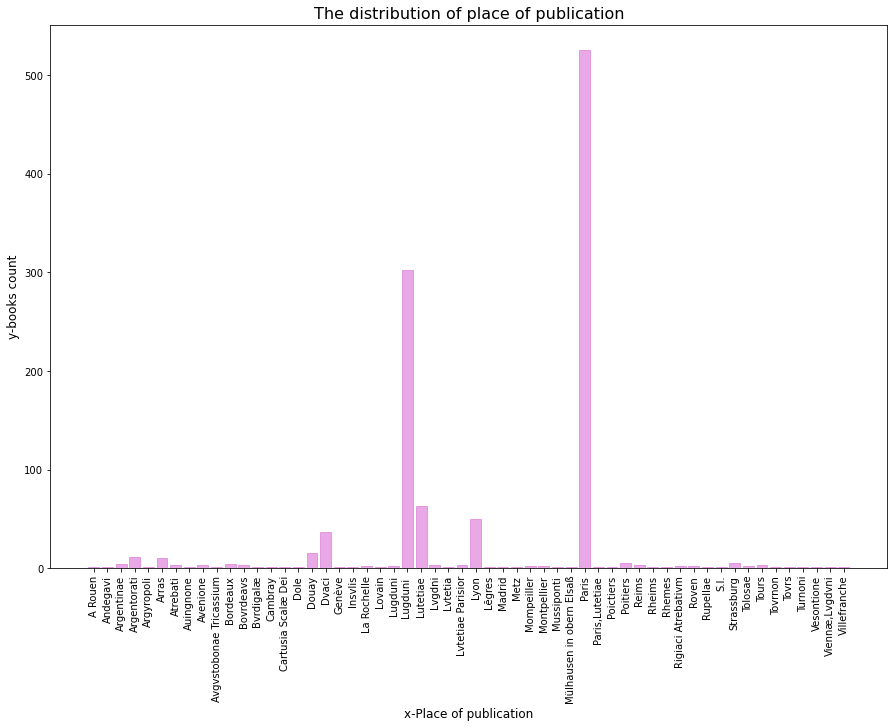

In [282]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15,10))
plt.title('The distribution of place of publication',fontsize = 16)
plt.xlabel(u'x-Place of publication',fontsize = 12)
plt.ylabel(u'y-books count',fontsize = 12)
plt.bar(df_pop['Place of publication'],df_pop['books count'],alpha=0.6,facecolor = 'orchid',edgecolor = 'orchid')
plt.xticks(rotation=450)
plt.show()

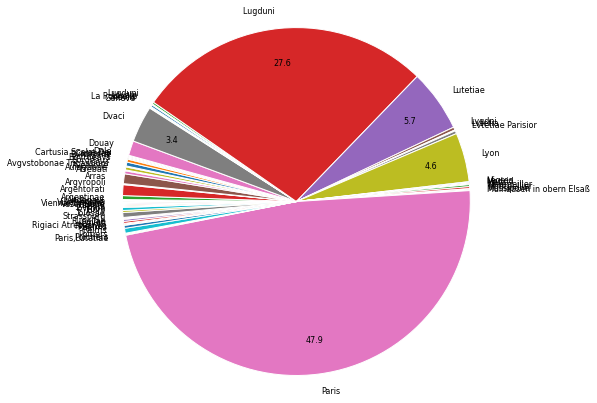

In [283]:
# y= [525, 165,133,50,40,31,23,140]
# labels = ['paris','Lugduni','Lvgdvni','Lyon','Lvtetiae']

def my_autopct(pct):
    return ('%.1f' % pct) if pct > 3 else ''

    
plt.pie(x=df_pop['percentage'],  
        explode= None, 
        labels = df_pop['Place of publication'],
        autopct=my_autopct,  
        pctdistance=0.8,  
        labeldistance=1.1, 
        startangle=180,  
        radius=2, 
        counterclock=False, 
        wedgeprops={'linewidth':1, 'edgecolor':'white'},
        textprops={'fontsize':8, 'color':'black'},
        )
# plt.title('Percentage of books published per place')
plt.show()

### 1.2 analysis for distribution of book languages 

In [284]:
df['language'].describe()

count      1058
unique       20
top       lat  
freq        692
Name: language, dtype: object

As there are two or three languages included for certain books, I separate rows of multivalues to make it possible to abalyse in pandas dateframe. For example,a book(Id9992145780001488) was written in Lation,greek, and french, orginally showed as "9992145780001488, lation,greek, and french", I divide it into three rows"9992145780001488,Latin", "9992145780001488,greek", and "9992145780001488,french".

In [285]:
dfl1 = df.loc[:,['control number','language 1']].rename(columns = {'language 1':'language'})
dfl2 = df.loc[:,['control number','language 2']].rename(columns = {'language 2':'language'})
dfl3 = df.loc[:,['control number','language 3']].rename(columns = {'language 3':'language'})
dfl3

,control number,language
0,9992130780001488,NaN
1,9992132490501488,NaN
2,9992133457501488,NaN
3,9992133466101488,NaN
4,9992133466501488,NaN
...,...,...
1102,9912185740101488,NaN
1103,9912186430101488,NaN
1104,9912233500101488,NaN
1105,9912244960101488,NaN


In [286]:
dfl = pd.concat([dfl1,dfl2,dfl3]).dropna()
dfl

,control number,language
0,9992130780001488,lat
1,9992132490501488,lat
2,9992133457501488,lat
3,9992133466101488,fre
4,9992133466501488,fre
...,...,...
1086,9911248610101488,gre
39,9992185397301488,lat
175,9919144900101488,syc
532,9984024190101488,heb


1.2.1 How many books including more than one language? 

In [287]:
language_a = dfl.groupby('control number')['language'].count()
df_language = language_a.to_frame()
df_language.reset_index(inplace = True)
df_language.rename(columns = {'language':'number of books'},inplace = True)
df_language

,control number,number of books
0,99557680101488,2
1,99567340101488,1
2,99580490101488,2
3,99590790101488,1
4,991456620101488,1
...,...,...
1053,9992616206101488,1
1054,9992616206301488,1
1055,9992616208201488,1
1056,9992623309501488,1


In [288]:
df_language.groupby('number of books')['control number'].count()

number of books
1    971
2     83
3      4
Name: control number, dtype: int64

1.2.2 what is the top 5 language for books?

In [289]:
language_b = dfl.groupby('language')['control number'].count()
df_language_b = language_b.to_frame()
df_language_b.reset_index(inplace = True)
df_language_b.rename(columns = {'control number':'languages count'},inplace = True)
df_language_b

,language,languages count
0,eng,1
1,fre,266
2,ger,5
3,grc,69
4,gre,20
5,heb,5
6,ita,4
7,lat,776
8,spa,1
9,syc,2


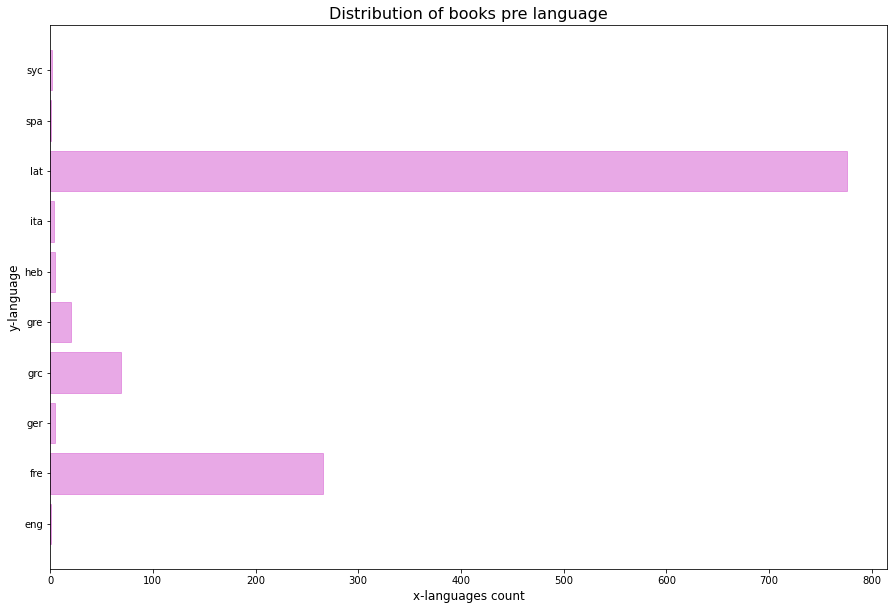

In [290]:
plt.figure(figsize = (15,10))
plt.title('Distribution of books pre language',fontsize = 16)
plt.xlabel(u'x-languages count',fontsize = 12)
plt.ylabel(u'y-language',fontsize = 12)
plt.barh(df_language_b['language'],df_language_b['languages count'],alpha=0.6,facecolor = 'orchid',edgecolor = 'orchid')
plt.show()

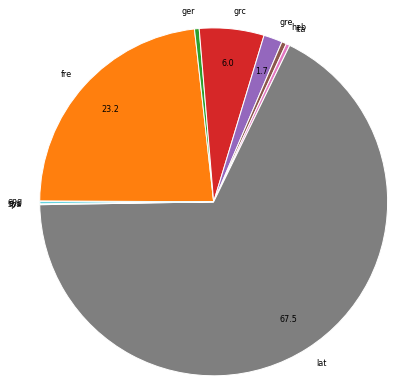

In [291]:

def my_autopct(pct):
    return ('%.1f' % pct) if pct > 1 else ''

plt.pie(x=df_language_b['languages count'],  
        explode= None, 
        labels = df_language_b['language'],
        autopct= my_autopct,  
        pctdistance=0.8,  
        labeldistance=1.1, 
        startangle=180,  
        radius=2, 
        counterclock=False, 
        wedgeprops={'linewidth':1, 'edgecolor':'white'},
        textprops={'fontsize':8, 'color':'black'},
        )

plt.show()


In [292]:
language_b1 = df.groupby('language')['control number'].count()
language_b1

language
eng              1
fre            254
fre grc          2
fre gre lat      1
fre ita          1
fre lat          5
ger              5
grc             15
grc lat         19
grc lat syc      1
gre lat          3
ita              3
lat            692
lat fre          3
lat grc         31
lat gre         15
lat gre heb      1
lat heb          4
lat syc grc      1
spa              1
Name: control number, dtype: int64

## 2.linguistic features

2 the most frequent terms in title 

In [294]:
import nltk
nltk.download('punkt')

# from nltk.corpus import stopwords
# latin_stopwords = stopwords.words("latin")


[nltk_data] Downloading package punkt to C:\Users\Riley
[nltk_data]     vlog\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [296]:
corpus = []
for text in df['Title']:
    for token in nltk.word_tokenize(text):
        if token not in ".,?!:;()[]''``*&et.../deinDelades":
            corpus.append(token.lower())

word_counter = {}
for word in corpus:
    if word not in word_counter:
        word_counter[word] = 0
    word_counter[word] += 1  
    
# print(word_counter)
# print(max(word_counter.values()))

for word, count in word_counter.items():
    if count == max(word_counter.values()):
        print(word)

libri


## 3.Social_network analysis

data prepartion for gephi

In [299]:
df1 = df.loc[:,['control number','personal_name_1','personal_relationship_1']]
df2 = df.loc[:,['control number','personal_name_2','personal_relationship_2']]
df3 = df.loc[:,['control number','personal_name_3','personal_relationship_3']]
df4 = df.loc[:,['control number','personal_name_4','personal_relationship_4']]
df5 = df.loc[:,['control number','personal_name_5','personal_relationship_5']]
df6 = df.loc[:,['control number','personal_name_6','personal_relationship_6']]
df7 = df.loc[:,['control number','personal_name_7','personal_relationship_7']]
df8 = df.loc[:,['control number','personal_name_8','personal_relationship_8']]
df9 = df.loc[:,['control number','personal_name_9','personal_relationship_9']]
df10 = df.loc[:,['control number','personal_name_10','personal_relationship_10']]
df11 = df.loc[:,['control number','personal_name_11','personal_relationship_11']]
df12 = df.loc[:,['control number','personal_name_12','personal_relationship_12']]
df13 = df.loc[:,['control number','personal_name_13','personal_relationship_13']]
df14 = df.loc[:,['control number','personal_name_14','personal_relationship_14']]
df15 = df.loc[:,['control number','personal_name_15','personal_relationship_15']]
df16 = df.loc[:,['control number','personal_name_16','personal_relationship_16']]
df17 = df.loc[:,['control number','personal_name_17','personal_relationship_17']]
df18 = df.loc[:,['control number','personal_name_18','personal_relationship_18']]
df19 = df.loc[:,['control number','personal_name_19','personal_relationship_19']]
df20 = df.loc[:,['control number','personal_name_20','personal_relationship_20']]
df21 = df.loc[:,['control number','personal_name_21','personal_relationship_21']]
df22 = df.loc[:,['control number','personal_name_22','personal_relationship_22']]
df23 = df.loc[:,['control number','personal_name_23','personal_relationship_23']]

#.dropna(how='all')


In [301]:
df1.rename(columns = {'personal_name_1':'personal name','personal_relationship_1':'personal relationship'},inplace = True)
df2.rename(columns = {'personal_name_2':'personal name','personal_relationship_2':'personal relationship'},inplace = True)
df3.rename(columns = {'personal_name_3':'personal name','personal_relationship_3':'personal relationship'},inplace = True)
df4.rename(columns = {'personal_name_4':'personal name','personal_relationship_4':'personal relationship'},inplace = True)
df5.rename(columns = {'personal_name_5':'personal name','personal_relationship_5':'personal relationship'},inplace = True)
df6.rename(columns = {'personal_name_6':'personal name','personal_relationship_6':'personal relationship'},inplace = True)
df7.rename(columns = {'personal_name_7':'personal name','personal_relationship_7':'personal relationship'},inplace = True)
df8.rename(columns = {'personal_name_8':'personal name','personal_relationship_8':'personal relationship'},inplace = True)
df9.rename(columns = {'personal_name_9':'personal name','personal_relationship_9':'personal relationship'},inplace = True)
df10.rename(columns = {'personal_name_10':'personal name','personal_relationship_10':'personal relationship'},inplace = True)
df11.rename(columns = {'personal_name_11':'personal name','personal_relationship_11':'personal relationship'},inplace = True)
df12.rename(columns = {'personal_name_12':'personal name','personal_relationship_12':'personal relationship'},inplace = True)
df13.rename(columns = {'personal_name_13':'personal name','personal_relationship_13':'personal relationship'},inplace = True)
df14.rename(columns = {'personal_name_14':'personal name','personal_relationship_14':'personal relationship'},inplace = True)
df15.rename(columns = {'personal_name_15':'personal name','personal_relationship_15':'personal relationship'},inplace = True)
df16.rename(columns = {'personal_name_16':'personal name','personal_relationship_16':'personal relationship'},inplace = True)
df17.rename(columns = {'personal_name_17':'personal name','personal_relationship_17':'personal relationship'},inplace = True)
df18.rename(columns = {'personal_name_18':'personal name','personal_relationship_18':'personal relationship'},inplace = True)
df19.rename(columns = {'personal_name_19':'personal name','personal_relationship_19':'personal relationship'},inplace = True)
df20.rename(columns = {'personal_name_20':'personal name','personal_relationship_20':'personal relationship'},inplace = True)
df21.rename(columns = {'personal_name_21':'personal name','personal_relationship_21':'personal relationship'},inplace = True)
df22.rename(columns = {'personal_name_22':'personal name','personal_relationship_22':'personal relationship'},inplace = True)
df23.rename(columns = {'personal_name_23':'personal name','personal_relationship_23':'personal relationship'},inplace = True)

In [302]:
df_network = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22,df23]).dropna(thresh=2)
df_network

,control number,personal name,personal relationship
1,9992132490501488,"Rebuffi, Pierre",aut
2,9992133457501488,Priscianus Caesariensis.,aut
4,9992133466501488,"Le Roy, Louis",aut
5,9992133467601488,"Delbène, Alphonse",aut
6,9992135299701488,Anselmus Cantuariensis,aut
...,...,...,...
202,9935346840101488,"Viringus, Georgius W.",eul
202,9935346840101488,"Viringus, Jacobus Walterius",eul
202,9935346840101488,"Viringus, Joannes Walterius",aut
202,9935346840101488,"Viringus, Johannes Walters",eul


In [303]:
df_network.to_csv('D:\KU Leuven\DH Introduction\Assignment2\social_network_data.csv')

In [304]:
df_1 = pd.read_csv(r'D:\KU Leuven\DH Introduction\Assignment2\social-network-data-csv_1.csv')

In [305]:
df_11 = df_1.loc[:,['control number','personal name 1','personal relationship']]
df_12 = df_1.loc[:,['control number','personal name 2','personal relationship']]
df_13 = df_1.loc[:,['control number','personal name 3','personal relationship']]

In [306]:
df_11.rename(columns = {'personal name 1':'personal name'},inplace = True)
df_12.rename(columns = {'personal name 2':'personal name'},inplace = True)
df_13.rename(columns = {'personal name 3':'personal name'},inplace = True)

In [307]:
df_network_final = pd.concat([df_11,df_12,df_13]).dropna()
df_network_final

,control number,personal name,personal relationship
0,9992132490501488,Rebuffi,aut
1,9992133457501488,Priscianus Caesariensis.,aut
2,9992133466501488,Le Roy,aut
3,9992133467601488,Delbène,aut
4,9992135299701488,Anselmus Cantuariensis,aut
...,...,...,...
2518,9935346840101488,Jacobus Walterius,eul
2519,9935346840101488,Joannes Walterius,aut
2520,9935346840101488,Johannes Walters,eul
2521,9935346840101488,Petrus,eul


In [314]:
df_network_final.loc[(df_network_final['personal relationship'] == 'aut')]

,control number,personal name,personal relationship
0,9992132490501488,Rebuffi,aut
1,9992133457501488,Priscianus Caesariensis.,aut
2,9992133466501488,Le Roy,aut
3,9992133467601488,Delbène,aut
4,9992135299701488,Anselmus Cantuariensis,aut
...,...,...,...
2504,9932512660101488,Julius,aut
2510,9932512660101488,Publius,aut
2512,9932512660101488,Julius,aut
2514,9932512660101488,Sulpitius,aut


In [ ]:
df_network_final['personal relationship'].unique()

In [312]:
df_network_final.to_csv('D:\KU Leuven\DH Introduction\Assignment2\social_network_data_ready_for_gephi.csv')